In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue
from numpy.polynomial import polynomial as P

import data_catalog
import esmlab_wrap
import tseries_mod
from utils import time_year_plus_frac

In [2]:
data_catalog.set_catalog('experiments')
regions = ['Global']

active catalog: experiments


In [3]:
clobber = os.environ['CLOBBER'] == 'True' if 'CLOBBER' in os.environ else False
cluster = ncar_jobqueue.NCARCluster() if clobber else None

In [4]:
def Cinv_lnd_drift_summary(experiment, varnames = ['TOTECOSYSC', 'XSMRPOOL']):
    ds = tseries_mod.tseries_get_vars(varnames, 'lnd', experiment, cluster_in=cluster)
    ds_ann = esmlab_wrap.compute_ann_mean(ds)
    for region in regions:
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            tseries_mod.tseries_plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(P.polyfit(t, y, 1))

[ 2.54767545e+03 -2.73352766e-02]
[-4.79042598e+00 -1.56536651e-05]


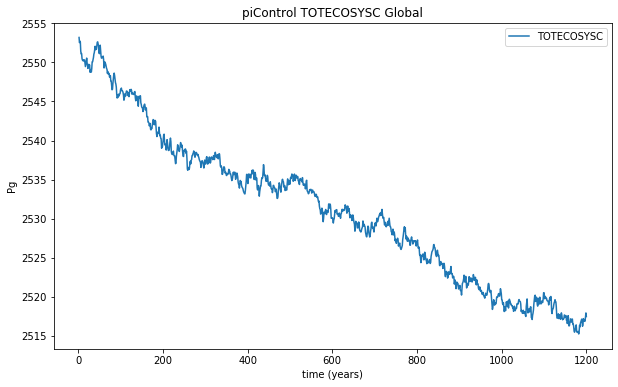

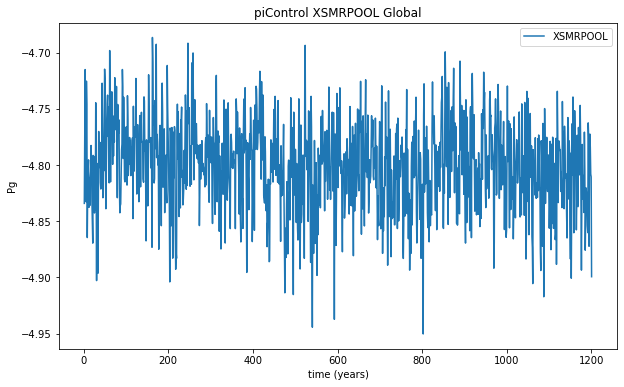

In [5]:
Cinv_lnd_drift_summary(experiment='piControl')

[ 2.54455903e+03 -7.16454109e-02]
[-4.79248965e+00  2.70147654e-05]


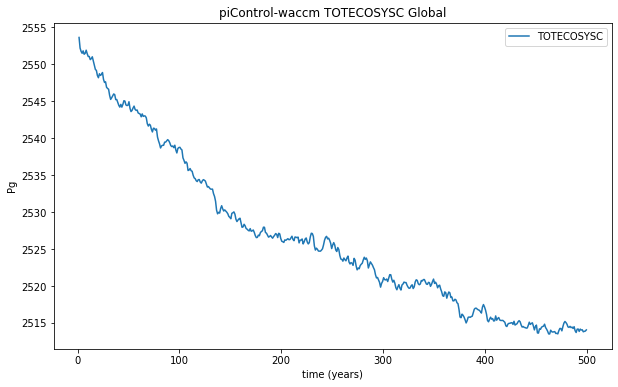

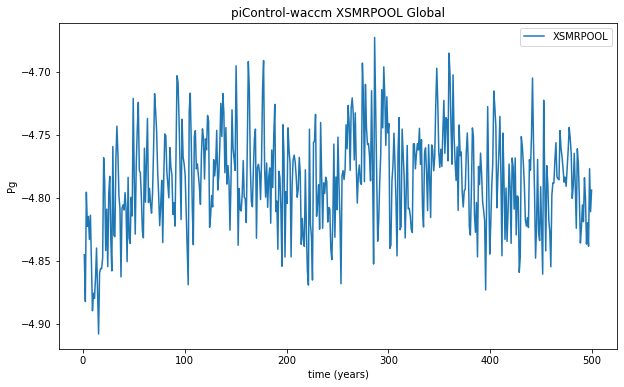

In [6]:
Cinv_lnd_drift_summary(experiment='piControl-waccm')

[2.10507704e+03 2.17300626e-03]
[-4.81962695e+00 -5.83675287e-05]


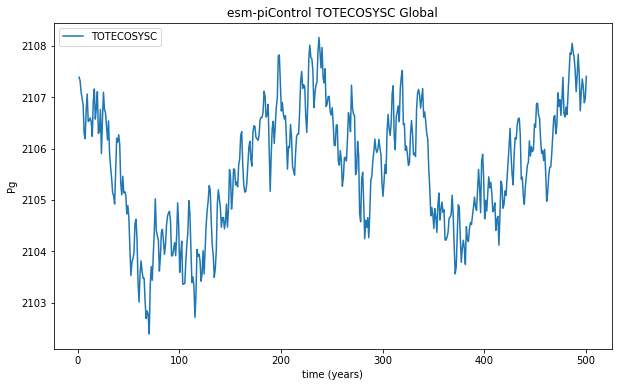

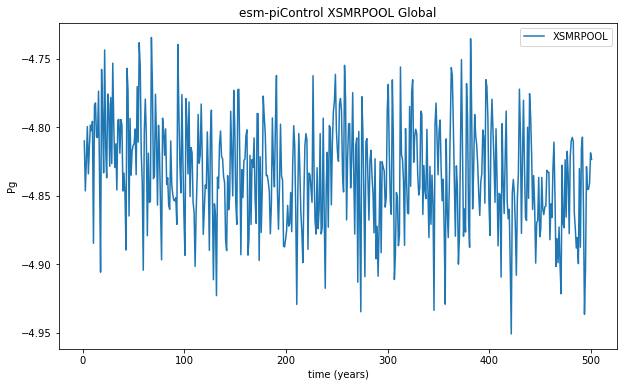

In [7]:
Cinv_lnd_drift_summary(experiment='esm-piControl')

entering _tseries_gen for TOTECOSYSC
['/glade/scratch/klindsay/archive/b40.prescribed_carb.001/lnd/proc/tseries/monthly/b40.prescribed_carb.001.clm2.h0.TOTECOSYSC.000101-100012.nc']
https://jupyterhub.ucar.edu/dav/user/klindsay/proxy/8787/status
entering _tseries_gen for XSMRPOOL
['/glade/scratch/klindsay/archive/b40.prescribed_carb.001/lnd/proc/tseries/monthly/b40.prescribed_carb.001.clm2.h0.XSMRPOOL.000101-100012.nc']
https://jupyterhub.ucar.edu/dav/user/klindsay/proxy/8787/status
[1.16941671e+03 1.05132105e-02]
[-7.40003571e+00 -1.19321295e-05]


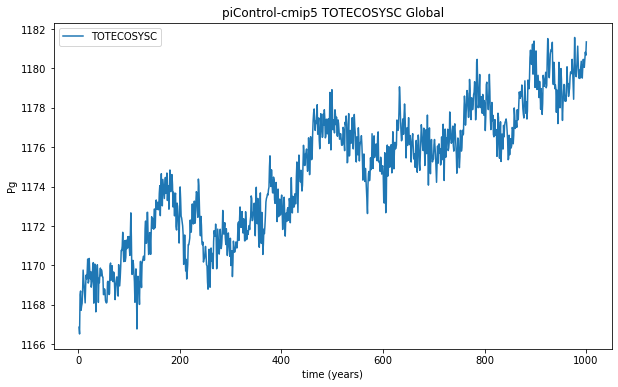

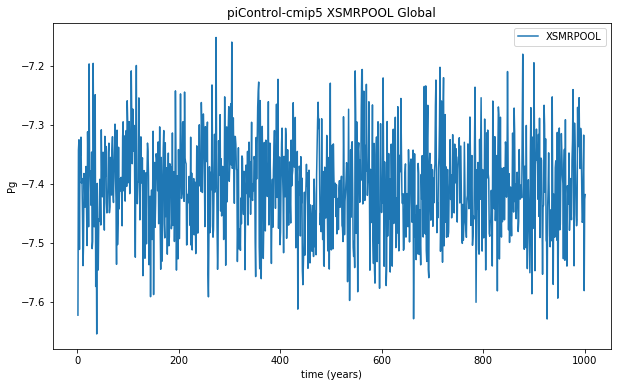

In [8]:
Cinv_lnd_drift_summary(experiment='piControl-cmip5')

entering _tseries_gen for TOTECOSYSC
['/glade/scratch/klindsay/archive/b40.coup_carb.004/lnd/proc/tseries/monthly/b40.coup_carb.004.clm2.h0.TOTECOSYSC.000101-100012.nc']
https://jupyterhub.ucar.edu/dav/user/klindsay/proxy/8787/status
entering _tseries_gen for XSMRPOOL
['/glade/scratch/klindsay/archive/b40.coup_carb.004/lnd/proc/tseries/monthly/b40.coup_carb.004.clm2.h0.XSMRPOOL.000101-100012.nc']
https://jupyterhub.ucar.edu/dav/user/klindsay/proxy/8787/status
[1.17105339e+03 1.33199216e-02]
[-7.39335470e+00 -1.75280189e-05]


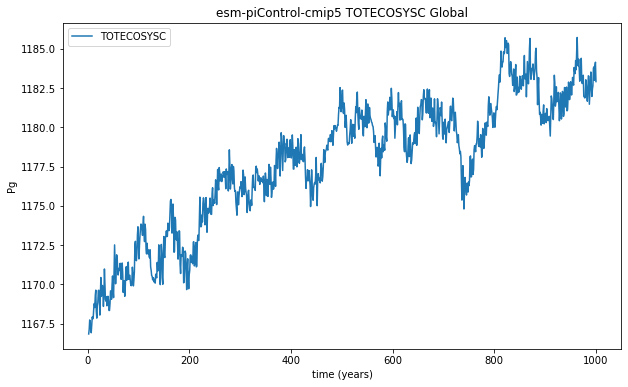

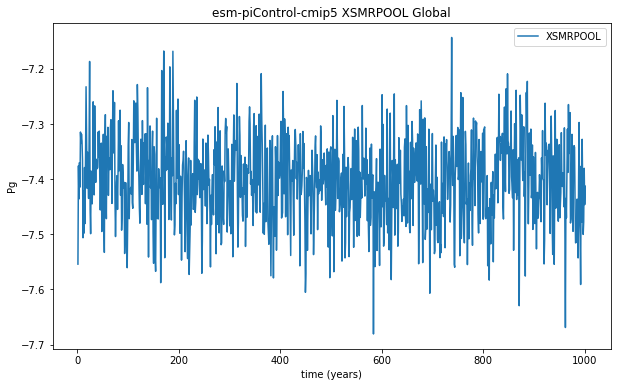

In [9]:
Cinv_lnd_drift_summary(experiment='esm-piControl-cmip5')

In [10]:
if clobber:
    cluster.close()